generated data: Counter({0: 9900, 1: 100})


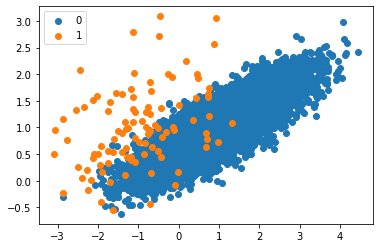

Undersampled data: Counter({0: 200, 1: 100})


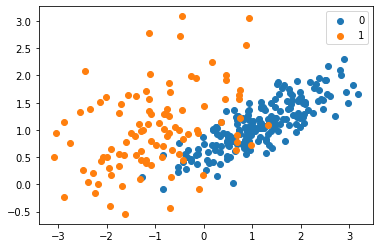

In [4]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

# 가상의 분류모형 데이터를 생성
X, y = make_classification(n_samples=10000 #표본 데이터의 수
                           , n_features=2 # 독립 변수의 수
                           , n_redundant=0 # 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수
                           ,n_clusters_per_class=1  # 클래스 당 클러스터의 수
                           , weights=[0.99]  # 각 클래스에 할당된 표본 수
                           , flip_y=0  # 클래스가 무작위로 할당 된 샘플의 비율.
                                       #값이 클수록 레이블에 노이즈가 발생하고 분류 작업이 더 어려워짐
                           , random_state=1 #난수 seed 설정
                          )

counter = Counter(y)
print('generated data: %s' % counter) #undersampling 전 데이터 수 
#undersampling 전 
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

#undersamping 
# 많은 비율을 차지하는 다수 집단에서 일부만 샘플링
under = RandomUnderSampler(sampling_strategy=0.5)  # 2 : 1 비율로 undersamping
X, y = under.fit_resample(X, y)   # resampling 
counter = Counter(y)
print('Undersampled data: %s' % counter) #undersampling 후 데이터 수

#undersampling 후
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()